<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/07_machine_learning_intro/07_workalong01_machine_learning_basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Machine Learning Basics

This workalong walks through some of the basic elements of modern machine learning, including *rectified linear units (reLU)*, *loss functions*, *backpropagation*, and the use of `pytorch`.

## Rectified linear units (reLU)

In the cell below, implement two functions:
 1. `linear(x,w,b)`
 2. `relu(x)` 

as indicated in the functions' docstrings.  (Note, remove the lines with `pass` - this is just a line of code that says to Python "do nothing"...it's necessary because function's can't be empty in Python.)

Test that it works as expected, and keep your tests in the notebook.

In [2]:
""" Define a linear and relu function. """
import numpy as np

def linear(x : np.ndarray, w : float = 1, b : float = 0) -> np.ndarray:
    """ returns w*x + b """
    return w*x + b

def relu(x : np.ndarray) -> np.ndarray:
    """ returns x if x is positive, 0 otherwise"""
    return np.maximum(x, 0) # np.maximum returns the element-wise maximum of two arrays

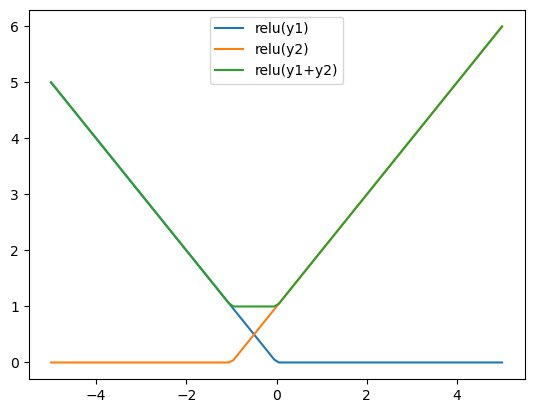

In [3]:
""" Test the relu function. """
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

y1 = relu(linear(x, w=-1, b=0))
y2 = relu(linear(x, w=1, b=1))

plt.plot(x, y1, label="relu(y1)")
plt.plot(x, y2, label="relu(y2)")
plt.plot(x, y1+y2, label="relu(y1+y2)")
plt.legend()


## Fitting a function with reLUs

1. Run the cell below to create a graph of fake, noisy data (variable `noisy_data`).
1. In the cell below that, create a function `relu_sum` that is the sum of two reLUs with a bias (a scalar) added at the end
1. Create a new plot that includes the function output and the noisy data
1. Adjust the `w` and `b` parameters until the function approximates the fake data.
1. Comment in a markdown cell on your observations, what you learned, etc.



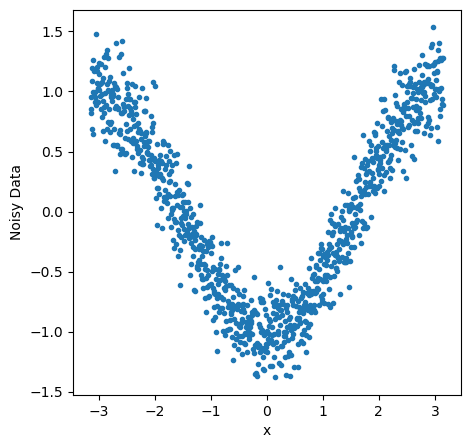

In [87]:
""" Create a fake, noisy dataset. """

# define the x values
x = np.linspace(-np.pi, np.pi, 1000)

# define the y values of the true function
y_true = -np.cos(x)

# add some noise to the true function
np.random.seed(5984)
noisy_data = y_true + np.random.normal(0, 0.2, len(x))

# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.set_xlabel("x")
ax.set_ylabel("Noisy Data")
plt.show()

In [88]:
""" Define a function that is the sum of two relus. """

def relu_sum(x : np.ndarray, w : np.ndarray, b : np.ndarray, bias : float = 0) -> np.ndarray:
    """ returns relu(w[0]*x + b[0]) + relu(w[1]*x + b[1]) + bias """
    return relu(w[0]*x + b[0]) + relu(w[1]*x + b[1]) + bias
    




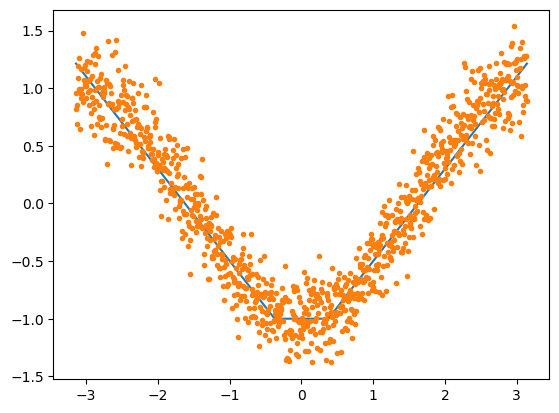

In [89]:
""" Plot the sum of two relus, with w, b such that the function fits the data. """
w = np.array([-.8, .8])
b = np.array([.3,.3])
fig, ax = plt.subplots()
bias=-1.6

ax.plot(x, relu_sum(x, w, b, bias), label="relu_sum")
ax.plot(x, noisy_data, '.', label="data")
plt.show()

## Loss function

Now define a *loss* function $\mathcal{L}$: in this case *mean-squared error (MSE)* for the fit $\hat{\mathbf{z}}$ relative to the data $\mathbf{z}$

$$ \mathcal{L} = \frac{1}{N} \sum\limits_{i=0}^{N-1} (z_i - \hat{z}_i)^2$$

Calculate the loss for your fit to the data above: we'll compare in class.

In [90]:
""" Define a loss function. """

def loss(y_true : np.ndarray, y_pred : np.ndarray) -> float:
    """ returns the mean squared error between y_true and y_pred """
    loss = (1/len(y_true))*np.sum((y_true - y_pred)**2)
    return loss

# calculate the loss for the fit
true = noisy_data
pred = relu_sum(x, w, b, bias)
test_loss = loss(true, pred)
print(f"Test loss: {test_loss:.4f}")

""" Define a function to calculate the gradient of the loss function. """


Test loss: 0.0467


' Define a function to calculate the gradient of the loss function. '

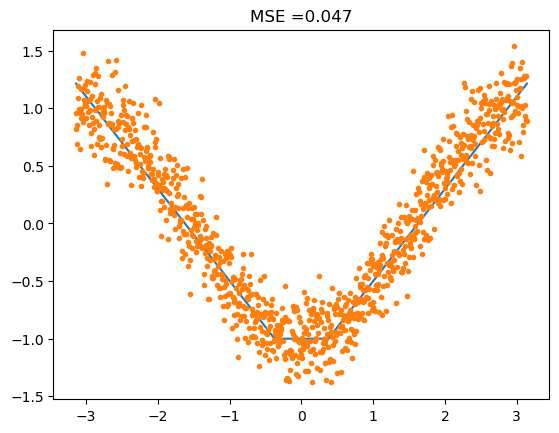

In [91]:
""" Plot the sum of two relus, with w, b such that the function fits the data. """
w = np.array([-.8, .8])
b = np.array([.3,.3])
fig, ax = plt.subplots()
bias=-1.6

ax.plot(x, relu_sum(x, w, b, bias), label="relu_sum")
ax.plot(x, noisy_data, '.', label="data")

plt.title(f"MSE ={test_loss.round(3)}")
plt.show()

Add the loss to the title of the plot, and vary the parameters further to see if you can minimize the loss.

In [92]:
""" Vary parameters, minimizing the loss (include loss in title). """



' Vary parameters, minimizing the loss (include loss in title). '

## ReLUs in `pytorch`

Now we'll take advantage of `pytorch` for automating the process of fitting a NN model.

In [93]:
""" Define a neural network with a single hidden layer. """
# import pytorch
import torch
import torch.nn as nn
# set the random seed for reproducibility
torch.manual_seed(5984)


In [94]:
""" Show the initial model prediction/fit (it's bad)"""

class Net(nn.Module):
    def __init__(self, n_relus : int = 2):

        super().__init__()

        # create a neural net
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, n_relus), # layer 1
            nn.ReLU(), # layer 2
            nn.Linear(n_relus, 1), # layer 3
        )


    def forward(self, x):

        # similar to evaluate func
        out = self.linear_relu_stack(x)
        return out

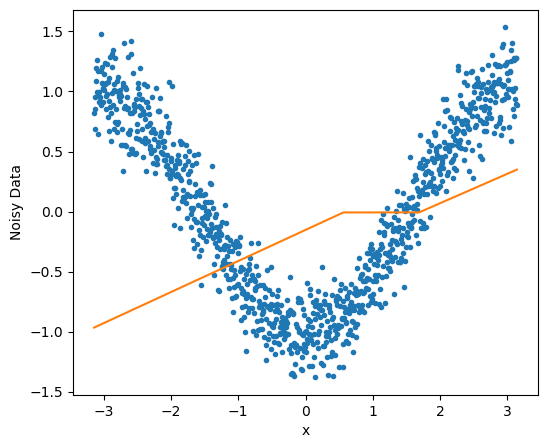

In [95]:
""" Show the initial model prediction/fit (it's bad)"""

# convert the x values and y values to pytorch tensors
xt = torch.from_numpy(x).unsqueeze(1).to(torch.float32)
yt = torch.from_numpy(noisy_data).unsqueeze(1).to(torch.float32)

# create the 2 relu model
model_2 = Net(n_relus = 2)

# calculate the prdiction
pred = model_2(xt)

# plot the noisy data and fit
fig, ax = plt.subplots(figsize = (6,5))
ax.plot(x, noisy_data, '.', label="data")
ax.plot(x, pred.detach().numpy(), label="fit")
ax.set_xlabel("x")
ax.set_ylabel("Noisy Data")
plt.show()

### Training the model - the simple, but not-so-great way

We'll use a simple for loop to train the model on all the data.  This is bad because we don't split the dataset into train, test, and validation sets; this can make our efforts prone to overfitting.

But for simplicity, we'll forge forward with this (inadvisable) approach.

In [96]:
""" Train the model the bad way. """
# set hyperparameters
learning_rate = 0.01
training_steps = 1000

# define the model
torch.manual_seed(5984)
model_2 = Net(n_relus = 5000)

# define the loss function
loss_fn = nn.MSELoss()

# define the optimizer
optim = torch.optim.Adam(model_2.parameters(), lr = learning_rate)

for n in range(training_steps):
    # calculate the prediction
    pred = model_2(xt)

    # calculate the loss
    loss = loss_fn(pred, yt)

    # zero the gradients
    optim.zero_grad()

    # calculate the gradients of the parameters wrt the loss
    loss.backward()

    # update the parameters
    optim.step()

    # print the loss every 100 steps
    if n % 100 == 0:
        print(f"Step {n}: {loss.item():.3f}")


Step 0: 0.594
Step 100: 0.054
Step 200: 0.043
Step 300: 0.041
Step 400: 0.041
Step 500: 0.040
Step 600: 0.040
Step 700: 0.040
Step 800: 0.040
Step 900: 0.040


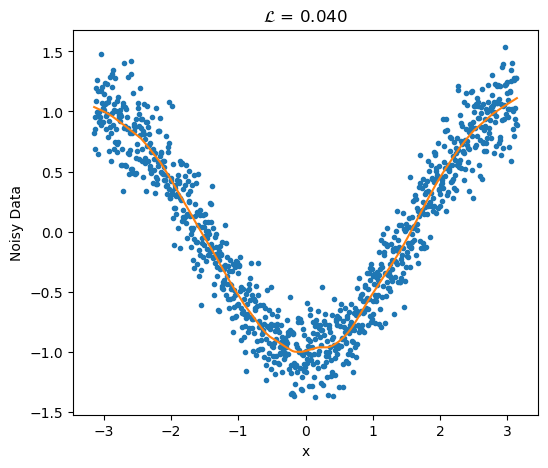

In [97]:
""" Plot the trained model. """
# calcuate the prediction
pred = model_2(xt)

# calculate the loss
loss = loss_fn(pred, yt)

# plot the noisy data and fit
fig, ax = plt.subplots(figsize = (6,5))
ax.plot(x, noisy_data, '.', label="data")
ax.plot(x, pred.detach().numpy(), label="fit")
ax.set_xlabel("x")
ax.set_ylabel("Noisy Data")
ax.set_title("$\mathcal{L}$ = " +  f"{loss.item():.3f}")
plt.show()

### Training the model - the better, but more complicated way

We'll follow standard practice here to split the data into test, train and validation sets.  We'll also use pytorch's data loader to do training in batches, and we'll put our training loop into a function.  This will allow us to train in *epochs* (passes through the entire dataset).

In [98]:
""" Train the model the better, but more complicated way. """
# set hyperparameters
learning_rate = 0.01
num_epochs = 20
batch_size = 32
training_fraction = 0.8
test_fraction = 0.1
num_relus = 2

# define the model
torch.manual_seed(5984)
model_2 = Net(n_relus = num_relus)


# define the loss function
loss_fn = nn.MSELoss()

# define the optimizer
optim = torch.optim.Adam(model_2.parameters(), lr = learning_rate)

# set the sizes of the training, test, and validation sets
num_data_total = len(x)
n_train = int(num_data_total*training_fraction) # number of training data
n_train = int(test_fraction*num_data_total) # number of test data
n

print(f"Training on {n_train} data points, testing on {n_test} data points and validating on {n_valid} data points.")

#create a random set of indices
# seed the random number generator
np.random.seed(5984)
i_random = np.random.choice(num_data_total, num_data_total, replace = False)

# use the random indices for training , tst and validation seets
i_train = i_random[:n_train] # indices for training set
i_test = i_random[n_train:n_train+n_test] # next 10% of indices for test set
i_valid = i_random[n_train+n_test:] # remaining indices for validation set

# create the training, teest, and validation sets
from torch.utils.data import TensorDataset, DataLoader

x_train = xt[i_train]
y_train = yt[i_train]
train_ds = TensorDataset(x_train, y_train)

x_test = xt[i_test]
y_test = yt[i_test]
test_ds = TensorDataset(x_test, y_test)

x_valid = xt[i_valid]
y_valid = yt[i_valid]
valid_ds = TensorDataset(x_valid, y_valid)

# create the data loaders
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True) 
test_dl = DataLoader(test_ds, batch_size = batch_size, shuffle = False)
valid_dl = DataLoader(valid_ds, batch_size = batch_size, shuffle = False)

def train_loop(dataloader, model, loss_fn, optimizer):
    """ Trains the model for one epoch. """
    # set the model to training mode
    model.train()

    # a list of lossed for each batch
    batch_losses = []   

    # loop over each batch
    for batch_num, (xx, yy) in enumerate(dataloader):

        # calculate the prediction
        pred = model(xx)

        # calculate the loss
        loss = loss_fn(pred, yy)

        # zero the gradients
        # optimizer.zero_grad()

        # calculate the gradients of the parameters wrt the loss
        loss.backward()

        # update the parameters
        optimizer.step()

        # append the loss for this batch
        batch_losses.append(loss.item())

    # calculate the average loss for this epoch
    epoch_loss = np.mean(batch_losses) # average loss for this epoch

    return epoch_loss

def test_loop(dataloader, model, loss_fn):
    """ Run the model on the test set. """
    # put the model in evaluation mode
    model.eval()
     
    # initialize a list of losses
    loss = 0 
    
    # loop over each batch
    with torch.no_grad():
        for xx, yy in dataloader:
            # calculate the prediction
            pred = model(xx)

            # calculate the loss
            loss += loss_fn(pred, yy).item()




' Train the model the better, but more complicated way. '

In [99]:
""" Plot the prediction """


' Plot the prediction '